# Master SparkML: Practical Guide for Machine Learning


Welcome to this comprehensive SparkML tutorial. The world of data is growing at an exponential pace and traditional data analysis tools often fall short when dealing with big data. This is where Apache Spark comes into play. With its ability to perform in-memory processing and run complex algorithms at scale, Spark is a vital tool in the toolkit of every data scientist and big data enthusiast.

This tutorial will demonstrate how to install and use PySpark in a Google Colab environment, load a real-world dataset "[Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)", perform data preprocessing, and build machine learning models with SparkML. Whether you're a beginner stepping into the field of data science, a data analyst looking to dive deeper into big data analytics, or a seasoned data scientist wanting to harness the power of Spark for machine learning, this tutorial is designed for you.

By the end of this tutorial, you will have a strong understanding of how to install and run Pyspark in Google Colab, load and process data in `Spark`, and utilize `SparkML` for predictive modelling.

You can run this post in Google Colab using this link:

<a href="https://colab.research.google.com/github/arminnorouzi/sparkml/blob/main/Notebooks/sparkml_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this Tutorial we will cover these sections:

## Table of Contents
- Introduction
- Installation
- Dataset
- Data Preprocessing
- Model Building
- Model Evaluation and Tuning
- Conclusion

# Introduction

`Apache Spark` is an open-source, distributed computing system used for big data processing and analytics. `SparkML` is the machine learning library that comes with `Spark`, which provides a range of algorithms for classification, regression, clustering, collaborative filtering, and much more.

`SparkML` was developed to address the needs of processing large-scale data using machine learning algorithms in a distributed environment. As datasets have continued to grow in size, traditional machine learning libraries like `Scikit-learn`, which are excellent for small to medium-sized data, may not scale effectively. `SparkML`, with its distributed computing capabilities, enables processing of big data across a cluster of computers, thereby significantly speeding up the machine learning process.

At its core, `SparkML` works by dividing data across multiple nodes in a cluster to process it in parallel. The results are then combined to produce the output. This process, known as MapReduce, allows SparkML to handle large datasets efficiently.

## SparkML vs Scikit-learn

While both `SparkML` and `Scikit-learn` are powerful tools for machine learning, there are some differences between the two:

1. **Scale of data**: As mentioned earlier, `SparkML` is designed for large-scale distributed computing, making it an excellent choice for big data processing. `Scikit-learn`, on the other hand, is more suited for small to medium-sized data and is not designed to natively handle distributed computing.

2. **Data types**: `SparkML` supports a variety of data types that are not available in `Scikit-learn`. For instance, it can directly work with sparse data formats, saving significant memory and computation resources when dealing with high-dimensional sparse data.

3. **Algorithms**: Both libraries offer a wide range of machine learning algorithms. However, `Scikit-learn` has a slightly more extensive list of algorithms, particularly for unsupervised learning. SparkML is continuously growing, though, and more algorithms are added with each release.

4. **Ease of use**: `Scikit-learn` has a straightforward and consistent API, making it very user-friendly. `SparkML`, on the other hand, has a steeper learning curve because of its distributed nature and the need to manage data partitions and clusters.

5. **Integration with other tools**: `SparkML` has better integration with big data tools like Hadoop and can work directly on data stored in Hadoop Distributed File System (HDFS). `Scikit-learn` does not natively support Hadoop integration.

In conclusion, while `Scikit-learn` remains a great tool for traditional machine learning tasks, `SparkML` has a definite edge when it comes to big data. By using SparkML, you can leverage the power of distributed computing for machine learning tasks, making it a powerful tool in the era of big data. 

# Installation
Before start let's install `Pyspark` first:


In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=17bf849a19236bbae657e869ce2829d8180098dc47797044c9581d2e690820a9
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


Now that Spark is installed, let's load SparkSession which is the entry point to any Spark functionality.

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkML").getOrCreate()


# Loading the Dataset 
We will be using the "Data Science Salaries 2023" dataset, available at: 

https://raw.githubusercontent.com/arminnorouzi/sparkml/main/Data/ds_salaries.csv

Let's load this CSV data into a Spark DataFrame. We will use the spark.read.csv function, passing in the path to the CSV file, and setting inferSchema to True so that Spark automatically detects the data types for each column.

In [3]:
# Download the file using wget
!wget -q https://raw.githubusercontent.com/arminnorouzi/sparkml/main/Data/ds_salaries.csv

# Now, read the local CSV file into a DataFrame
df = spark.read.option("inferSchema", "true").option("header", "true").csv("ds_salaries.csv")

Now our data is loaded into a Spark DataFrame named df. You can display the first few records in this DataFrame using the show method:

In [4]:
df.show()

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2023|              SE|             FT|Principal Data Sc...| 80000|            EUR|        85847|                ES|         100|              ES|           L|
|     2023|              MI|             CT|         ML Engineer| 30000|            USD|        30000|                US|         100|              US|           S|
|     2023|              MI|             CT|         ML Engineer| 25500|            USD|        25500|                US|         100|              US|           S|
|     2023

You can also view the schema of this DataFrame using the printSchema method:

In [5]:
df.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



Data Science Job Salaries Dataset contains 11 columns, each are:

- `work_year`: The year the salary was paid.
- `experience_level`: The experience level in the job during the year
- `employment_type`: The type of employment for the role
- `job_title`: The role worked in during the year.
- `salary`: The total gross salary amount paid.
- `salary_currency`: The currency of the salary paid as an ISO 4217 currency code.
- `salaryinusd`: The salary in USD
- `employee_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- `remote_ratio`: The overall amount of work done remotely
- `company_location`: The country of the employer's main office or contracting branch
- `company_size`: The median number of people that worked for the company during the year


This will give us an idea of the structure of our data, the number of records, and the types of variables we're working with. This knowledge is crucial when preparing our data for machine learning algorithms.

# Exploratory Data Analysis

Exploratory Data Analysis is an essential step before building a model. It helps us to understand the dataset, brings important aspects of data into focus, and provides valuable insights.

Let's start by examining the overall summary statistics of the DataFrame.


In [6]:
df.describe().show()

+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+------------------+----------------+------------+
|summary|         work_year|experience_level|employment_type|           job_title|            salary|salary_currency|     salary_in_usd|employee_residence|      remote_ratio|company_location|company_size|
+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+------------------+----------------+------------+
|  count|              3755|            3755|           3755|                3755|              3755|           3755|              3755|              3755|              3755|            3755|        3755|
|   mean|2022.3736351531293|            null|           null|                null|190695.57177097205|           null|137570.38988015978|              null|46.271637816245004|      

Let's see how many unique values each of the categorical columns have.

In [7]:
from pyspark.sql.functions import col

for column in df.columns:
    if str(df.schema[column].dataType) in ['StringType()']:
        print(f"Number of unique values in {column}: {df.select(col(column)).distinct().count()}")


Number of unique values in experience_level: 4
Number of unique values in employment_type: 4
Number of unique values in job_title: 93
Number of unique values in salary_currency: 20
Number of unique values in employee_residence: 78
Number of unique values in company_location: 72
Number of unique values in company_size: 3


Understanding the number of unique values in each categorical column can help us determine whether we should use one-hot encoding or other encoding techniques when preprocessing the data for our machine learning models.

Now, let's examine the correlation between numerical variables. This can be done by calculating the correlation matrix.

In [8]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import numpy as np

# Selecting numeric columns to build the vector assembler
numeric_data = df.select(df["work_year"], df["salary"], df["salary_in_usd"], df["remote_ratio"])

# Dropping NA values
numeric_data = numeric_data.dropna()

# Creating the vector assembler
vectorAssembler = VectorAssembler(inputCols=numeric_data.columns, outputCol="numeric_data")

# Transforming the numeric data
df_vector = vectorAssembler.transform(numeric_data).select("numeric_data")

# Getting the correlation matrix
matrix = Correlation.corr(df_vector, "numeric_data")

# Getting the correlation values
correlation_values = matrix.collect()[0]["pearson({})".format("numeric_data")].values

# Reshaping the correlation values to a matrix
correlation_matrix = np.reshape(correlation_values, (4, 4))

# Print the correlation matrix
print(correlation_matrix)


[[ 1.         -0.09472389  0.22829002 -0.23642984]
 [-0.09472389  1.         -0.02367581  0.02873085]
 [ 0.22829002 -0.02367581  1.         -0.06417099]
 [-0.23642984  0.02873085 -0.06417099  1.        ]]


Based on this matrix of correlation we can conclude that:

- `work_year` (Work Year) has a positive correlation of 0.228 with salary_in_usd (`Salary in USD`), which suggests that as the work years increase, the salary in USD tends to increase. However, the correlation is not very strong.

- `work_year` also has a negative correlation of -0.236 with `remote_ratio` (Remote Ratio), suggesting that as the work years increase, the ratio of remote work tends to decrease, and vice versa. Again, this correlation is not very strong.

- The correlations between `work_year` and `salary`, `salary` and `salary_in_usd`, and `salary` and `remote_ratio` are all relatively weak (closer to 0), indicating that there's no strong linear relationship between these variables.

- The variables `salary` and `salary_in_usd` also have a weak negative correlation (-0.023), as do `salary_in_usd`and `remote_ratio` (-0.064).

- There is a very weak positive correlation between `salary` and `remote_ratio` (0.028).

Based on these observations, it seems like `work_year` has the strongest (though still moderate) relationships with `salary_in_usd` and `remote_ratio`. However, none of the variables show a strong correlation with each other. Therefore, while building the model, it would be important to consider other features (like categorical variables) and their potential interactions as well.

Let's explore some of the categorical variables in more detail. We can visualize the distribution of job titles and employee residence. Note: We will be using the matplotlib and seaborn libraries for creating the visualizations and therefore we will first convert the Spark DataFrame to a Pandas DataFrame.

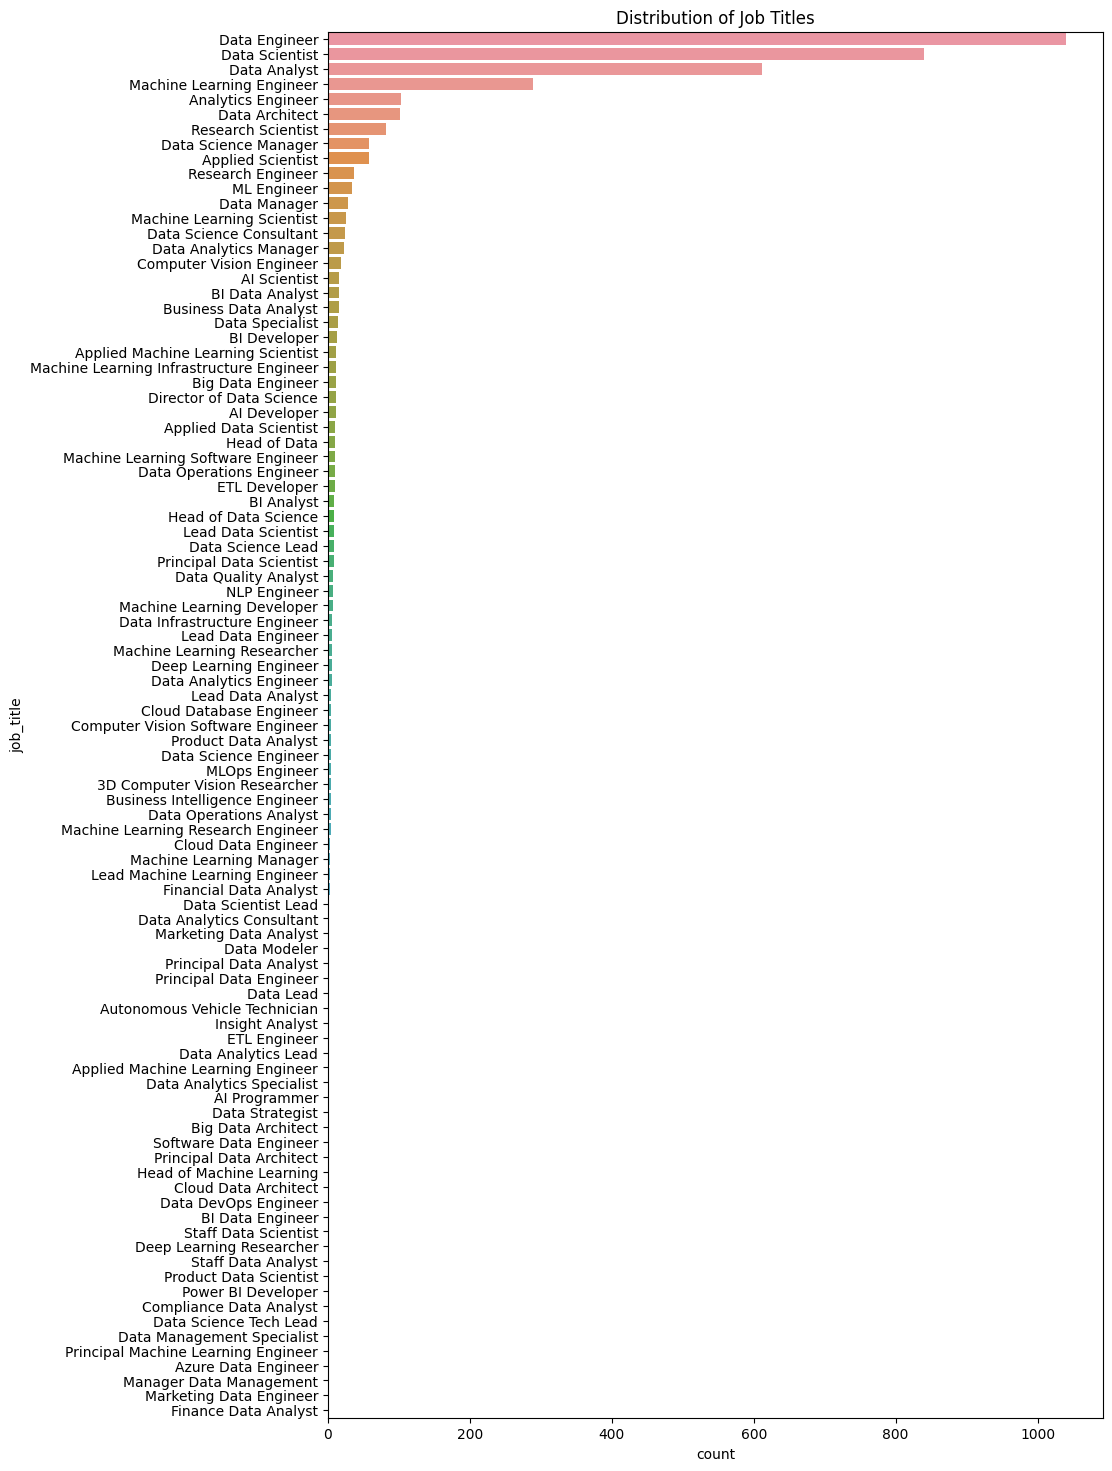

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas DataFrame
df_pandas = df.toPandas()

# Plotting distribution of job titles
plt.figure(figsize=(10,18))
sns.countplot(y='job_title', data=df_pandas, order=df_pandas['job_title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.show()



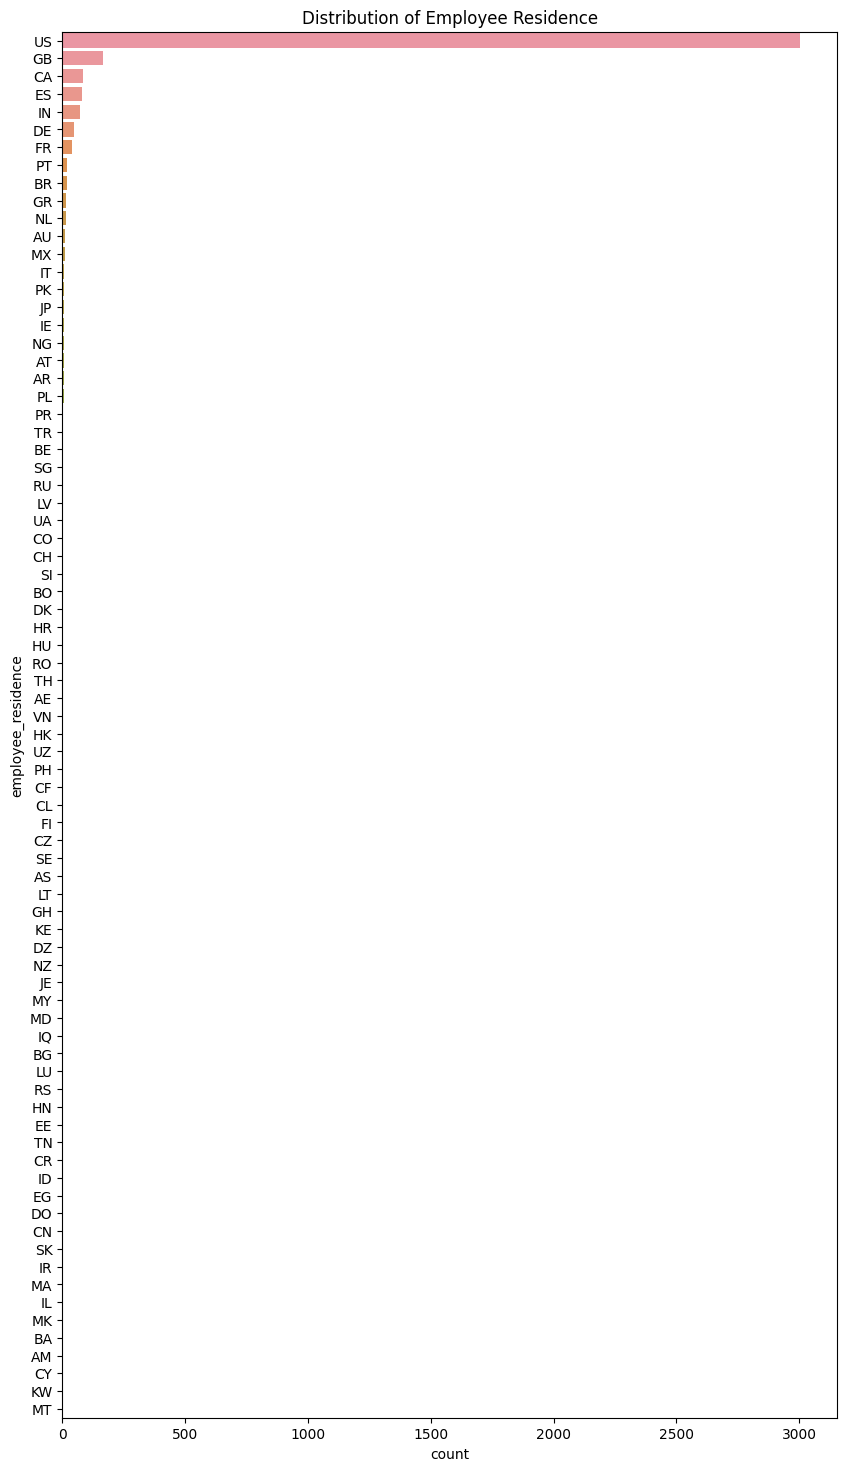

In [10]:
# Plotting distribution of employee residence
plt.figure(figsize=(10,18))
sns.countplot(y='employee_residence', data=df_pandas, order=df_pandas['employee_residence'].value_counts().index)
plt.title('Distribution of Employee Residence')
plt.show()


As you can see, we have more data for US - Let's filter data to predict US-based employee:

In [11]:
df = df.filter(df.employee_residence == 'US')

df.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



In [12]:
for column in df.columns:
    if str(df.schema[column].dataType) in ['StringType()']:
        print(f"Number of unique values in {column}: {df.select(col(column)).distinct().count()}")


Number of unique values in experience_level: 4
Number of unique values in employment_type: 3
Number of unique values in job_title: 70
Number of unique values in salary_currency: 1
Number of unique values in employee_residence: 1
Number of unique values in company_location: 6
Number of unique values in company_size: 3


So filtering data to US, required to remove some of reducntant columns. Let's remove `employee_residence`, `salary_currency` (as all in USD), and `salary` (`salary` will be same as `salary_in_usd` after filtering):

In [13]:
# now we can remove employee_residence
df = df.drop('employee_residence')
df = df.drop('salary_currency')
df = df.drop('salary')

Let's check the count of each column one more time:

In [14]:
for column in df.columns:
    if str(df.schema[column].dataType) in ['StringType()']:
        print(f"Number of unique values in {column}: {df.select(col(column)).distinct().count()}")


Number of unique values in experience_level: 4
Number of unique values in employment_type: 3
Number of unique values in job_title: 70
Number of unique values in company_location: 6
Number of unique values in company_size: 3


In [15]:
df.show()

+---------+----------------+---------------+--------------------+-------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary_in_usd|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+-------------+------------+----------------+------------+
|     2023|              MI|             CT|         ML Engineer|        30000|         100|              US|           S|
|     2023|              MI|             CT|         ML Engineer|        25500|         100|              US|           S|
|     2023|              SE|             FT|   Applied Scientist|       222200|           0|              US|           L|
|     2023|              SE|             FT|   Applied Scientist|       136000|           0|              US|           L|
|     2023|              SE|             FT|      Data Scientist|       147100|           0|              US|           M|
|     2023|     

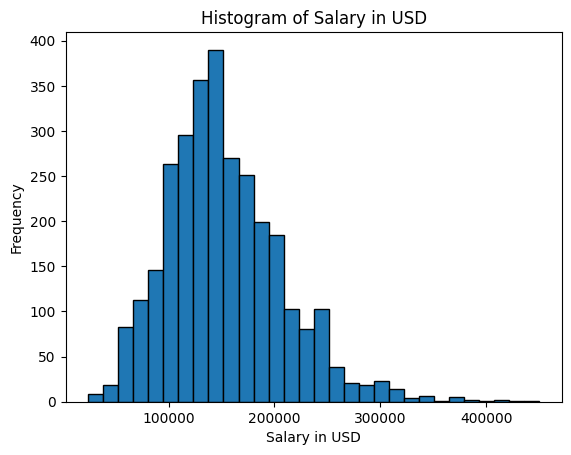

In [16]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.select('salary_in_usd').toPandas()

# Create a histogram
plt.hist(pandas_df['salary_in_usd'], bins=30, edgecolor='black')

# Set the title and labels
plt.title('Histogram of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

# Show the plot
plt.show()


# Data Preprocessing

Data preprocessing is a crucial step in the machine learning pipeline. It involves cleaning the data and transforming it into a format that machine learning algorithms can use.

## Handling Missing Values

First, let's handle missing values. PySpark DataFrame provides `na` property (an instance of DataFrameNaFunctions) with many useful functions for handling missing or null data.


In [17]:
# Drop the rows with missing values
df = df.na.drop()

## Removing duplicates
To remove duplicates from a DataFrame in PySpark, you can use the dropDuplicates() function. If you call this function without any parameters, it will drop any rows that have exactly the same values in all columns.

In [18]:
# Count before removing duplicates
count_before = df.count()
print(f"Count before removing duplicates: {count_before}")

# Remove duplicates
df = df.dropDuplicates()

# Count after removing duplicates
count_after = df.count()
print(f"Count after removing duplicates: {count_after}")

# Print the number of duplicates removed
print(f"Number of duplicates removed: {count_before - count_after}")


Count before removing duplicates: 3004
Count after removing duplicates: 1893
Number of duplicates removed: 1111


In [19]:
df.show()

+---------+----------------+---------------+--------------------+-------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary_in_usd|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+-------------+------------+----------------+------------+
|     2023|              SE|             FT|Machine Learning ...|       150000|           0|              US|           M|
|     2023|              SE|             FT|        Data Analyst|       105500|           0|              US|           M|
|     2023|              SE|             FT|       Data Engineer|       172800|           0|              US|           M|
|     2023|              SE|             FT|       Data Engineer|       107500|         100|              US|           M|
|     2023|              MI|             FT|       Data Engineer|        70000|           0|              US|           M|
|     2022|     

## Regression to classification
Instead of continuous variable 'salary_in_usd' which makes it a regression problem we can look at range of salary to make this problem a classification problem. One way to do that is to convert 'salary_in_usd' into different classes based on income brackets. Here, we can make use of the [U.S. Federal Tax Brackets](https://www.forbes.com/advisor/taxes/taxes-federal-income-tax-bracket/#:~:text=The%202023%20tax%20year%E2%80%94the,the%20bracket%20you're%20in.). We'll assign each record a class from 1 to 7 based on the 'salary_in_usd' column. Before, let's find min and max salary:

In [20]:
from pyspark.sql import functions as F

min_salary = df.agg(F.min(df.salary_in_usd)).first()[0]
max_salary = df.agg(F.max(df.salary_in_usd)).first()[0]

print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")

Minimum Salary: 24000
Maximum Salary: 450000


Now we can use 2023 Single Filer Tax Brackets to devide classes. As we don't have firs and last bracket, let's divided data like this:

- Over \$44,725 but not over \$95,375: This will be class 1.
- Over \$95,375 but not over \$182,100: This will be class 2.
- Over \$182,100 but not over \$231,250: This will be class 3.
- Over \$231,250: This will be class 5.

In [21]:
from pyspark.sql.functions import when

# Define the salary brackets
brackets = [(95375, 1), (182100, 2), (231250, 3)]

# Start from the highest bracket
df = df.withColumn("income_bracket", when(df["salary_in_usd"] > 231250, 4))

# Loop through the rest of the brackets
for bracket, label in reversed(brackets):
    df = df.withColumn("income_bracket", when(df["salary_in_usd"] <= bracket, label).otherwise(df["income_bracket"]))


In [22]:
df = df.drop('salary_in_usd')

Let's see classes

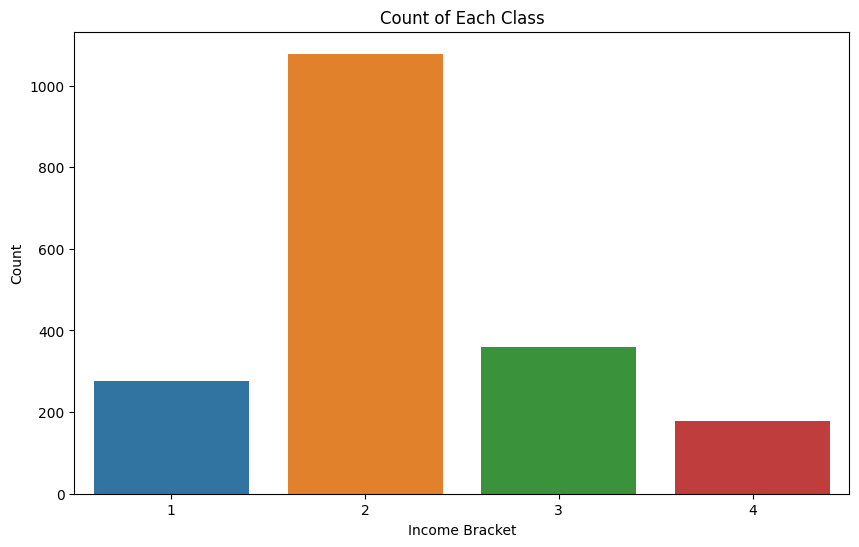

In [23]:
import seaborn as sns

# First, group by 'income_bracket' column and count
class_counts = df.groupBy("income_bracket").count().orderBy('income_bracket').toPandas()

# Plot the counts of each class
plt.figure(figsize=(10,6))
sns.barplot(x='income_bracket', y='count', data=class_counts)
plt.title('Count of Each Class')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()


## Encoding Categorical Variables

Next, let's handle categorical variables. Most machine learning models require numerical input. So, we need to convert categorical variables into numerical form. This can be achieved through One-Hot Encoding or String Indexing.

In [24]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# String Indexing for categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in df.columns if str(df.schema[column].dataType) == 'StringType()']

# Encoding for categorical columns
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol= column+"_ohe") for column in df.columns if str(df.schema[column].dataType) == 'StringType()']

# Pipeline stages
stages = indexers + encoders

# Adding indexers and encoders in a pipeline
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=stages)

# Transforming data
df = pipeline.fit(df).transform(df)
df.printSchema()


root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- experience_level_index: double (nullable = false)
 |-- employment_type_index: double (nullable = false)
 |-- job_title_index: double (nullable = false)
 |-- company_location_index: double (nullable = false)
 |-- company_size_index: double (nullable = false)
 |-- experience_level_ohe: vector (nullable = true)
 |-- employment_type_ohe: vector (nullable = true)
 |-- job_title_ohe: vector (nullable = true)
 |-- company_location_ohe: vector (nullable = true)
 |-- company_size_ohe: vector (nullable = true)




After the encoding process, we have a bunch of new columns, each suffixed with `_index` or `_ohe`. To clean up our DataFrame and get rid of the original, non-encoded categorical columns, we can drop them.

In [25]:
# Dropping original categorical columns
for column in df.columns:
    if str(df.schema[column].dataType) == 'StringType()':
        df = df.drop(column)

df.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- experience_level_index: double (nullable = false)
 |-- employment_type_index: double (nullable = false)
 |-- job_title_index: double (nullable = false)
 |-- company_location_index: double (nullable = false)
 |-- company_size_index: double (nullable = false)
 |-- experience_level_ohe: vector (nullable = true)
 |-- employment_type_ohe: vector (nullable = true)
 |-- job_title_ohe: vector (nullable = true)
 |-- company_location_ohe: vector (nullable = true)
 |-- company_size_ohe: vector (nullable = true)



In [26]:
df.show()

+---------+------------+--------------+----------------------+---------------------+---------------+----------------------+------------------+--------------------+-------------------+---------------+--------------------+----------------+
|work_year|remote_ratio|income_bracket|experience_level_index|employment_type_index|job_title_index|company_location_index|company_size_index|experience_level_ohe|employment_type_ohe|  job_title_ohe|company_location_ohe|company_size_ohe|
+---------+------------+--------------+----------------------+---------------------+---------------+----------------------+------------------+--------------------+-------------------+---------------+--------------------+----------------+
|     2023|           0|             2|                   0.0|                  0.0|            3.0|                   0.0|               0.0|       (3,[0],[1.0])|      (2,[0],[1.0])| (69,[3],[1.0])|       (5,[0],[1.0])|   (2,[0],[1.0])|
|     2023|           0|             2|         

The structure `(3,[0],[1.0])` (for example) is the representation of a sparse vector used by PySpark to save memory when dealing with high-dimensional data.

In Spark ML, one-hot encoding, and some other feature transformations, create SparseVectors, especially when dealing with categorical variables with a lot of levels.

In the SparseVector representation, the first number (3 in your example) denotes the size of the vector. The second list denotes the indices at which the vector has non-zero entries, and the third list denotes the values of these non-zero entries.

So, (3,[0],[1.0]) represents a vector of size 3, where the element at index 0 is 1.0, and the rest of the elements are 0. Therefore, the full vector would be [1.0, 0.0, 0.0].

This type of representation is very memory efficient when dealing with high dimensional sparse data (data where most of the values are zero), as it doesn't need to store any of the zeros. This becomes especially important when dealing with one-hot encoded features of high cardinality categorical variables.

In general, once you have transformed categorical variables using one-hot encoding, there's usually no need to keep the intermediate indexed column(s) created by StringIndexer. These columns are used as an intermediate step in the transformation process to convert string categorical values into numerical ones, and they are not typically used in the final machine learning model.

You can safely drop the indexed columns after the one-hot encoding is done to avoid redundancy and potential issues with multicollinearity.

In [27]:
# Dropping original categorical and index columns
for column in df.columns:
    if column.endswith('_index'):
        df = df.drop(column)

df.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- experience_level_ohe: vector (nullable = true)
 |-- employment_type_ohe: vector (nullable = true)
 |-- job_title_ohe: vector (nullable = true)
 |-- company_location_ohe: vector (nullable = true)
 |-- company_size_ohe: vector (nullable = true)



## Separate Features and Label:

Now, we will separate the features from the label which is 'income_bracket'. We create a 'features' column that combines all the feature vectors.

In [28]:
df.show()

+---------+------------+--------------+--------------------+-------------------+---------------+--------------------+----------------+
|work_year|remote_ratio|income_bracket|experience_level_ohe|employment_type_ohe|  job_title_ohe|company_location_ohe|company_size_ohe|
+---------+------------+--------------+--------------------+-------------------+---------------+--------------------+----------------+
|     2023|           0|             2|       (3,[0],[1.0])|      (2,[0],[1.0])| (69,[3],[1.0])|       (5,[0],[1.0])|   (2,[0],[1.0])|
|     2023|           0|             2|       (3,[0],[1.0])|      (2,[0],[1.0])| (69,[2],[1.0])|       (5,[0],[1.0])|   (2,[0],[1.0])|
|     2023|           0|             2|       (3,[0],[1.0])|      (2,[0],[1.0])| (69,[0],[1.0])|       (5,[0],[1.0])|   (2,[0],[1.0])|
|     2023|         100|             2|       (3,[0],[1.0])|      (2,[0],[1.0])| (69,[0],[1.0])|       (5,[0],[1.0])|   (2,[0],[1.0])|
|     2023|           0|             1|       (3,[1],[1

In [29]:
from pyspark.ml.feature import VectorAssembler

# Defining the feature columns
feature_columns = [column for column in df.columns if column != 'income_bracket']

# Separating features and target
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

df = assembler.transform(df)

# Selecting features and target
df = df.select('features', 'income_bracket')

# Let's see the transformed data
df.printSchema()


root
 |-- features: vector (nullable = true)
 |-- income_bracket: integer (nullable = true)



## Normalize Features:

Finally, we will normalize the feature vectors to bring them on the same scale using StandardScaler.

In [30]:
from pyspark.ml.feature import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(df)

# Normalize each feature to have unit standard deviation.
df = scalerModel.transform(df)

# Let's see the transformed data
df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- income_bracket: integer (nullable = true)
 |-- scaled_features: vector (nullable = true)



In [31]:
df.show()

+--------------------+--------------+--------------------+
|            features|income_bracket|     scaled_features|
+--------------------+--------------+--------------------+
|(83,[0,2,5,10,76,...|             2|[0.88167637673653...|
|(83,[0,2,5,9,76,8...|             2|[0.88167637673653...|
|(83,[0,2,5,7,76,8...|             2|[0.88167637673653...|
|(83,[0,1,2,5,7,76...|             2|[0.88167637673653...|
|(83,[0,3,5,7,76,8...|             1|[0.88167637673653...|
|(83,[0,1,2,5,7,76...|             2|[-0.6622767973297...|
|(83,[0,2,5,9,76,8...|             2|[-0.6622767973297...|
|(83,[0,1,3,5,7,76...|             2|[-2.2062299713960...|
|(83,[0,4,5,14,76,...|             2|[0.88167637673653...|
|(83,[0,2,5,7,76,8...|             3|[0.88167637673653...|
|(83,[0,1,2,5,8,76...|             2|[-0.6622767973297...|
|(83,[0,1,4,5,9,76...|             1|[-2.2062299713960...|
|(83,[0,1,2,5,9,76...|             1|[0.88167637673653...|
|(83,[0,2,5,14,76,...|             4|[0.88167637673653..

# Modeling

First, let's split the dataset into training and testing data:

In [32]:
# Train-test split
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)


In [33]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(featuresCol='features', labelCol='income_bracket'),
    "Random Forest Classifier": RandomForestClassifier(featuresCol='features', labelCol='income_bracket'),
    "Naive Bayes": NaiveBayes(featuresCol='features', labelCol='income_bracket')
}

# Define evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='income_bracket', metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='income_bracket', metricName="f1")

# Loop through models
for model_name, model in models.items():
    # Fit the model
    model_fit = model.fit(train_data)

    # Predict on train and test data
    test_results = model_fit.transform(test_data)
    train_results = model_fit.transform(train_data)

    # Compute accuracy and F1 score
    accuracy = evaluator_accuracy.evaluate(test_results)
    f1 = evaluator_f1.evaluate(test_results)
    accuracy_train = evaluator_accuracy.evaluate(train_results)
    f1_train = evaluator_f1.evaluate(train_results)

    # Print evaluation metrics
    print(f"{model_name}: Train Accuracy = {accuracy_train}, Train F1 = {f1_train}")
    print(f"{model_name}: Test Accuracy = {accuracy}, Test F1 = {f1}")



Decision Tree Classifier: Train Accuracy = 0.6019230769230769, Train F1 = 0.5118705330831265
Decision Tree Classifier: Test Accuracy = 0.5675675675675675, Test F1 = 0.48461021731569665
Random Forest Classifier: Train Accuracy = 0.5878205128205128, Train F1 = 0.4560819703418747
Random Forest Classifier: Test Accuracy = 0.5855855855855856, Test F1 = 0.45791235301058875
Naive Bayes: Train Accuracy = 0.12692307692307692, Train F1 = 0.10951574760092325
Naive Bayes: Test Accuracy = 0.11711711711711711, Test F1 = 0.10732322111632456


Accuracy is the proportion of true results (both true positives and true negatives) in the population. A higher accuracy means that the model correctly predicted more instances. As you can see, the Decision Tree Classifier has slightly higher accuracy than the Random Forest Classifier on both the training and test datasets.

F1 Score is the harmonic mean of precision and recall. A higher F1 Score signifies better model performance, particularly when class imbalances exist. Here, the Decision Tree Classifier also has a higher F1 score than the Random Forest Classifier.

To improve the performance of the models, we could:
- Tune the model hyperparameters: Each of these models has a variety of parameters that you can tune to improve performance. For example, you could adjust the depth of the trees, the number of trees in the forest, or the minimum number of instances required at a leaf node. In PySpark, you can use the ParamGridBuilder and CrossValidator classes to perform hyperparameter tuning.
- Address class imbalance: If your dataset is imbalanced, i.e., one or more classes have far fewer instances than the others, the models may not perform well. You can address this by oversampling the minority class, undersampling the majority class, or combining both. SMOTE (Synthetic Minority Over-sampling Technique) can also be used, but PySpark doesn't natively support it, so you would have to use a custom implementation.
- Feature engineering: You can create new features or modify existing ones to improve the models' performance potentially. Feature engineering is problem-dependent and requires an understanding of the data and the problem you're trying to solve.
 
Let's do some grid search to furthure optimize our tree models.

In [34]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize classifier and evaluator
rf = RandomForestClassifier(featuresCol='features', labelCol='income_bracket')
evaluator = MulticlassClassificationEvaluator(labelCol='income_bracket')

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 50, 100])  # number of trees
             .addGrid(rf.maxDepth, [5, 10, 15])  # maximum depth
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, 
                    numFolds=5)

# Run cross validations
cvModel = cv.fit(train_data)

# Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(test_data)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print("Test Accuracy: ", evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print("Test F1 Score: ", evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))


Test Accuracy:  0.5825825825825826
Test F1 Score:  0.4855296259608485


Visualizing the predictions versus the actual values can help us understand how well our model is performing. Here we can use Confusion Matrix. This is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.


Unfortunately, PySpark does not have built-in functionalities to visualize these metrics. So, we need to extract prediction and label columns, convert to Pandas DataFrame and use Python's popular data visualization library, Matplotlib.

Text(0.5, 118.72222222222216, 'Predicted label')

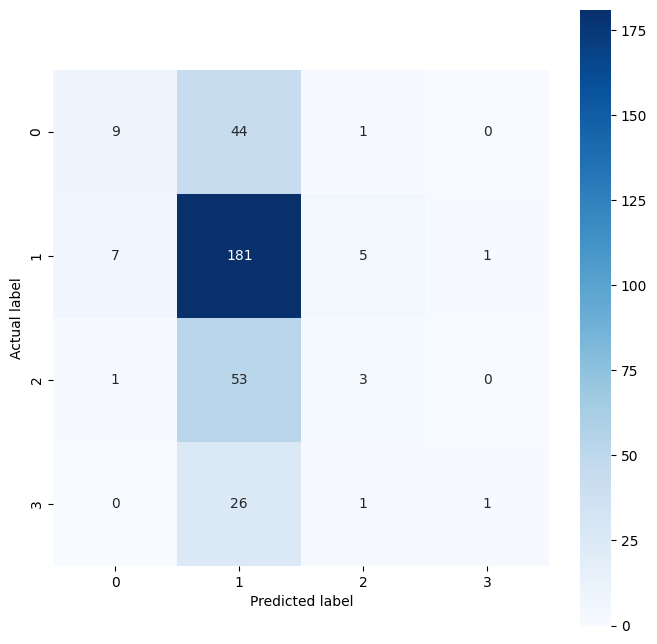

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
import seaborn as sns

# Convert to Pandas DataFrame
predictions_pd = predictions.select('income_bracket', 'prediction').toPandas()

# Confusion Matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(predictions_pd['income_bracket'], predictions_pd['prediction']), 
            annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



Let's breakdown the above confusion matrix:
The numbers on the diagonal of the matrix represent correct predictions:
- income_bracket 1: The model correctly predicted 9 instances.
- income_bracket 2: The model correctly predicted 181 instances.
- income_bracket 3: The model correctly predicted 3 instances.
- income_bracket 4: The model correctly predicted 1 instance.

The off-diagonal numbers represent incorrect predictions:
- Row 1: The model incorrectly predicted income_bracket 1 instances as income_bracket 2 44 times and income_bracket 3 1 time.
- Row 2: The model incorrectly predicted income_bracket 2 instances as income_bracket 1 7 times, income_bracket 3 5 times, and income_bracket 4 1 times.
- Row 3: The model incorrectly predicted income_bracket 3 instances as income_bracket 1 once and income_bracket 2 53 times.
Row 4: The model incorrectly predicted income_bracket 4 instances as income_bracket 2 26 times and income_bracket 3 once.

To summarize, the model shows a good True Positive rate for income_bracket 2, with 181 instances correctly identified. There's a significant number of False Negatives for income_bracket 2. It's often misclassified as income_bracket 1, 3, and 4.

The model has many False Positives for income_bracket 2, wrongly identifying instances from other classes as income_bracket 2. Also, income_bracket 1, 3, and 4 have low True Positive rates, indicating weak identification of these classes.

The model is biased towards predicting income_bracket 2, potentially due to class imbalance. We could use class weights, resampling, using a different algorithm, or collecting more diverse data. I think the practical next step is adding wights to classes. I will ask the reader to implement that and let me know in the comments how that goes.

Now let's try all of above with normalized features:

In [36]:
# Define the models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(featuresCol='scaled_features', labelCol='income_bracket'),
    "Random Forest Classifier": RandomForestClassifier(featuresCol='scaled_features', labelCol='income_bracket'),
}

# Define evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="income_bracket", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="income_bracket", metricName="f1")

# Loop through models
for model_name, model in models.items():
    # Fit the model
    model_fit = model.fit(train_data)

    # Predict on train and test data
    test_results = model_fit.transform(test_data)
    train_results = model_fit.transform(train_data)

    # Compute accuracy and F1 score
    accuracy = evaluator_accuracy.evaluate(test_results)
    f1 = evaluator_f1.evaluate(test_results)


    accuracy_train = evaluator_accuracy.evaluate(train_results)
    f1_train = evaluator_f1.evaluate(train_results)

    # Print evaluation metrics
    
    print(f"{model_name}: Train Accuracy = {accuracy_train}, Train F1 = {f1_train}")
    print(f"{model_name}: Test Accuracy = {accuracy}, Test F1 = {f1}")


Decision Tree Classifier: Train Accuracy = 0.6019230769230769, Train F1 = 0.5118705330831265
Decision Tree Classifier: Test Accuracy = 0.5675675675675675, Test F1 = 0.48461021731569665
Random Forest Classifier: Train Accuracy = 0.5878205128205128, Train F1 = 0.4560819703418747
Random Forest Classifier: Test Accuracy = 0.5855855855855856, Test F1 = 0.45791235301058875


As I don't see any improvement, I will stop here. Please let me know what should we do to improve results and I will keep update this post! 

# Conclusion
In this tutorial, we explored PySpark's MLlib for predicting US employee salary brackets, starting from installing PySpark to carrying out exploratory data analysis. We transformed our dataset, implemented multiple regression and classification models, and optimized the models using a grid search. Despite these results, it's worth noting that model performance can always be enhanced with further feature engineering, advanced models, and hyperparameter tuning. This tutorial demonstrated a blueprint for PySpark's machine learning capabilities, and we hope it encourages you to explore and experiment further. I will keep this post-open-ended and open to your suggestion on improving the model.